In [30]:
import scipy
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
IMAGE_SIZE = 256
CHANNELS = 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=128,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 8098 images belonging to 9 classes.


In [32]:
train_generator.class_indices

{'Aphids_C': 0,
 'Fungi_P': 1,
 'Healthy_P': 2,
 'Phytopthora_P': 3,
 'Powdery Mildew_C': 4,
 'Target spot_C': 5,
 'Target_Spot_T': 6,
 'Tomato_mosaic_virus': 7,
 'healthy_T': 8}

In [33]:
class_names = list(train_generator.class_indices.keys())
class_names

['Aphids_C',
 'Fungi_P',
 'Healthy_P',
 'Phytopthora_P',
 'Powdery Mildew_C',
 'Target spot_C',
 'Target_Spot_T',
 'Tomato_mosaic_virus',
 'healthy_T']

In [34]:
count=0
for image_batch, label_batch in train_generator:
     print(label_batch)
     print(image_batch[0])
     break
#     count+=1
#     if count>2:
#         break

[7. 7. 8. 5. 6. 5. 0. 7. 8. 6. 8. 4. 7. 8. 8. 7. 4. 6. 1. 8. 7. 7. 6. 7.
 5. 8. 8. 8. 8. 6. 7. 5. 1. 7. 1. 8. 7. 6. 6. 7. 8. 6. 6. 8. 0. 8. 8. 6.
 0. 8. 8. 6. 7. 0. 7. 8. 7. 8. 8. 5. 5. 6. 8. 6. 7. 3. 4. 6. 7. 8. 4. 8.
 1. 8. 6. 8. 7. 8. 8. 8. 8. 0. 8. 6. 6. 8. 8. 8. 5. 7. 3. 8. 3. 6. 8. 1.
 5. 1. 3. 8. 7. 6. 8. 7. 8. 7. 7. 4. 7. 6. 4. 7. 7. 6. 8. 3. 0. 5. 7. 1.
 8. 6. 8. 6. 3. 2. 7. 0.]
[[[0.01568628 0.         0.03529412]
  [0.01568628 0.         0.03529412]
  [0.01802516 0.         0.037633  ]
  ...
  [0.46565425 0.41433638 0.4937802 ]
  [0.46527737 0.41383386 0.49365455]
  [0.46490043 0.4133313  0.49352893]]

 [[0.01568628 0.         0.03529412]
  [0.01568628 0.         0.03529412]
  [0.01752262 0.         0.03713046]
  ...
  [0.45624384 0.40134186 0.4922089 ]
  [0.4567464  0.4018444  0.49296272]
  [0.4572489  0.40234694 0.4937165 ]]

 [[0.01568628 0.         0.03529412]
  [0.01568628 0.         0.03529412]
  [0.01702008 0.         0.03662793]
  ...
  [0.47192207 0.41702008 0.51539

In [35]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=128,
        class_mode="sparse"
)

Found 1010 images belonging to 9 classes.


In [36]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=128,
        class_mode="sparse"
)

Found 1020 images belonging to 9 classes.


In [37]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [38]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,137 (719.29 KB)

 Trainable params: 184,137 (719.29 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [41]:
history = model.fit(
    train_generator,
    steps_per_epoch=63,
    batch_size=128,
    validation_data=validation_generator,
    validation_steps=7,
    verbose=1,
    epochs=25
)

Epoch 1/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 637s 9s/step - accuracy: 0.3183 - loss: 1.8621 - val_accuracy: 0.5279 - val_loss: 1.2649
Epoch 2/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.6094 - loss: 1.0608 - val_accuracy: 0.4912 - val_loss: 1.3989
Epoch 3/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 606s 9s/step - accuracy: 0.5726 - loss: 1.1770 - val_accuracy: 0.6741 - val_loss: 0.9425
Epoch 4/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7812 - loss: 0.6839 - val_accuracy: 0.7193 - val_loss: 0.7985
Epoch 5/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 595s 9s/step - accuracy: 0.7114 - loss: 0.8252 - val_accuracy: 0.7411 - val_loss: 0.7773
Epoch 6/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.7188 - loss: 0.7860 - val_accuracy: 0.8070 - val_loss: 0.6304
Epoch 7/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 633s 9s/step - accuracy: 0.7501 - loss: 0.7238 - val_accuracy: 0.8002 - val_loss: 0.6195
Epoch 8/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7812 - loss: 0.6562 - val_accuracy: 0.7544 - v

In [42]:
scores = model.evaluate(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8698 - loss: 0.4233


first image to predict
actual label: healthy_T
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step
predicted label: healthy_T
[4.3230393e-06 1.5690353e-03 7.9679150e-05 1.3096703e-04 4.6879581e-08
 4.4251102e-04 2.8898069e-04 3.1057168e-03 9.9437886e-01]


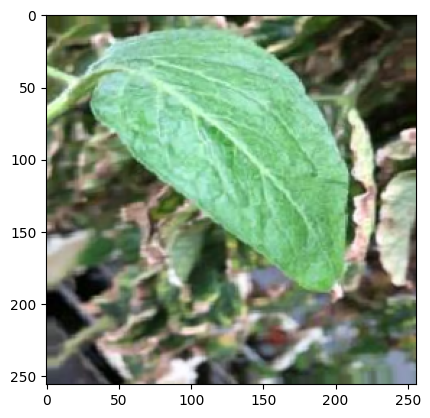

In [43]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    print(batch_prediction[0])
    
    break

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


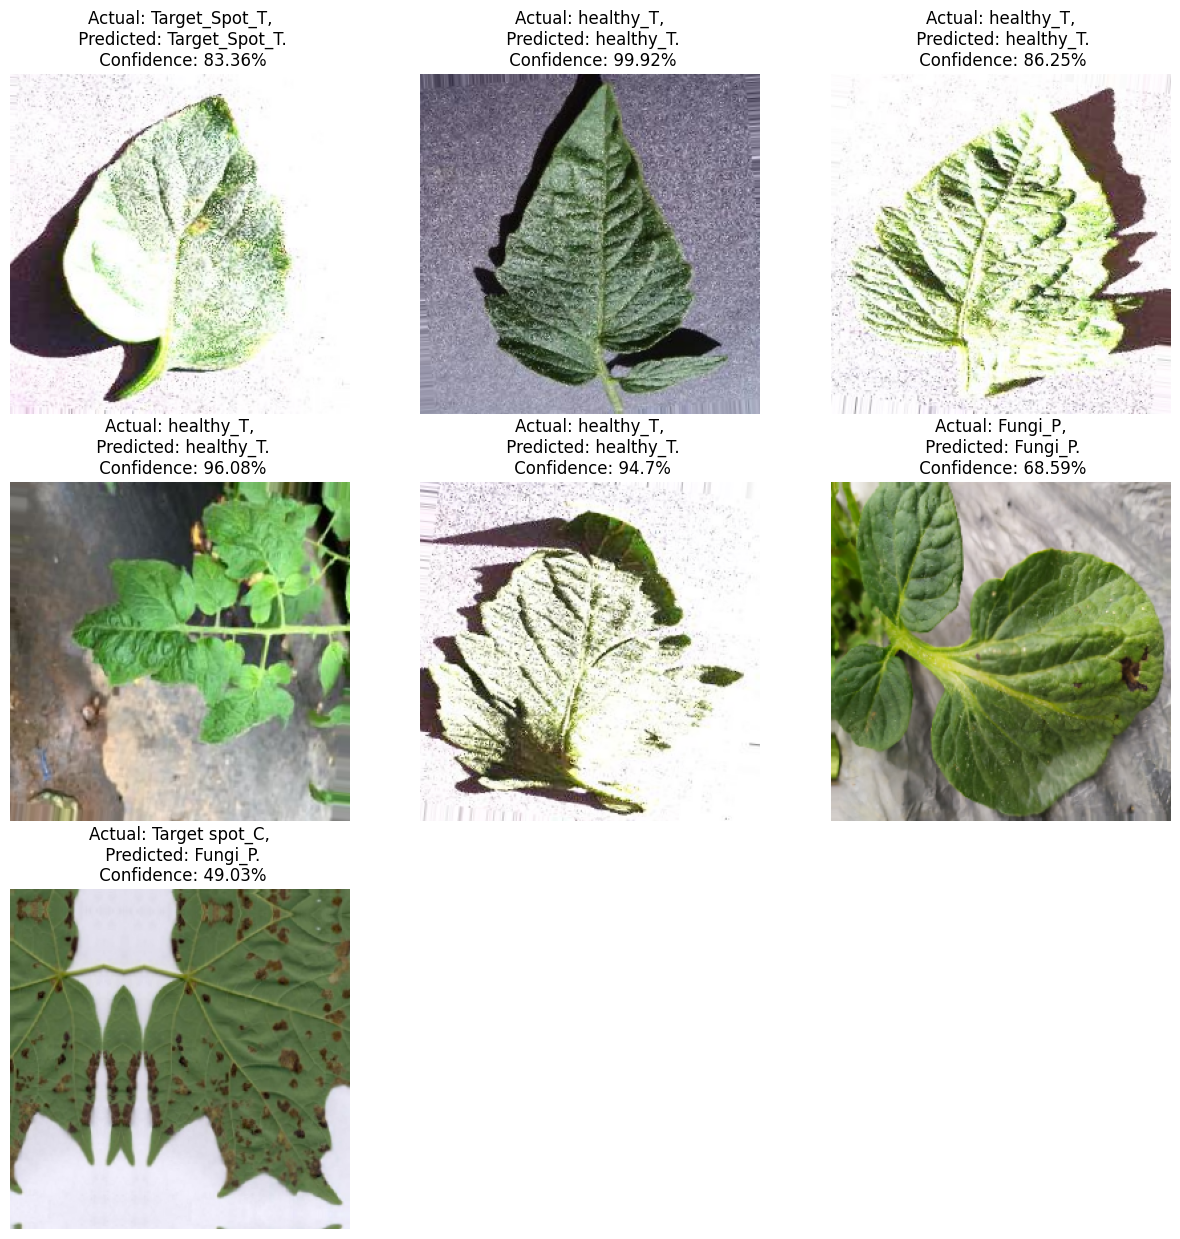

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(7):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, imagestf.saved_model.save(model, "./Versions/3diff.keras")[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [51]:
model.save('3diff.keras')

In [48]:
tf.saved_model.save(model, "../Versions/3diff.keras")

TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [52]:
model.save('3diff')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=3diff.